# 비지도학습(Unsupervised learning)
<!-- 1. [차원축소](#1.차원축소)
    - [차원축소 방법](###1-1-차원축소-방법)    
2. [주성분 분석](#2주성분-분석pca--principal-component-analysis)  
    - [실습하기]   
        - [데이터 생성](###2-1-1-데이터-생성)  
        - [데이터셋 표준화](###2-1-2-데이터셋-표준화)  
        - [주성분 분석](###2-1-3-주성분-분석)  
        - [교유값, 기여율, 누적기여율 계산](###2-1-4-고윳값-기여율-누적-기여율-계산)  
3. [t-SNE(t분산 확률적 이웃 임베딩)](#3t-snet분산-확률적-이웃-임베딩-t-distributed-stochastic-neighbor-embedding  
)  
    - [실습하기]  
        - [데이터 생성](###3-1-1-데이터-생성)  
        - [2차원 t-SNE 시각화](###3-1-2-2차원-t-sne-시각화)  
        - [3차원 t-SNE 시각화](###3-1-3-3차원-t-sne-시각화) -->

비지도학습이란?  
입력 데이터에 대한 label없이 학습키는 머신러닝 방법  
파악하기 어려운 문제를 찾아내거나 인식하지 못한 데이터의 특징을 알아낼 때 도움되며,  
주로 연관 있는 것들을 찾고 그룹핑하는 군집화(Clustering) 방식을 사용한다

지도학습에서 적절한 특성(feature)을 찾아내기 위한 전처리 방법으로 비지도학습을 사용하기도 한다.

# 1.차원축소
머신러닝은 알고리즘을 사용하여 데이터에서 패턴을 찾는데,  
학습 데이터에 특성 수가 적으면 성능이 떨어지고, 너무 많으면 과대적합 가능성이 높아진다.  
머신러닝에서 Dimensionality Reduction은 데이터의 중요한 특성을 남기고 불필요한 특성을 줄이는 것이다.  

차원축소는 고차원 공간에서 저차원 공간으로 데이터의 차원을 변환하므로 일부 정보 손실이 발생할 수 있다.  
그러므로 원본 데이터의 정보 손실을 최소화하면서 원본 데이터를 저차원으로 다시 표현하는 것이 관건이며 적재적소에 활용하는 것이 중요하다.  

# 1-1. 차원축소 방법
- 특성 선택(Feature Selection)
- 특성 추출(Feature Extraction)
  
**특성 선택(Feature Selection)**  
-> 훈련에 가장 유용한 특성을 선택한다.  
-> 모델의 정확도를 향상하기 위해 원본 데이터에서 가장 좋은 성능을 보여줄 수 있는 데이터의 부분집합(subset)을 찾아내는 방법  
  
**특성 추출(Feature Extraction)**  
-> 기존 특성을 반영해서 저차원의 중요 특성으로 압축하는 것  
-> 주어진 데이터를 더 잘 설명할 수 있도록 새로운 특성을 추출한다

# 1-2. 주성분 분석(PCA : Principal Component Analysis)
데이터의 분산을 최대한 유지하면서 특성이 많은 데이터세트의 차원을 줄이는 방법  
  
데이터의 분산을 최대한 보존하는 새로운 축을 찾고, 그 축에 데이터를 Projection해서 차원을 축소한다  
기존 특성을 조합하여 저차원 공간으로 변환하는 새로운 특성을 찾는다.  
여기서 새로운 특성을 주성분이라고 하며, 이들은 서로 직교하고 원본 데이터를 나타낼 수 있다.  
  
일반적으로 주성분 분석 결과에서 누적 기여율(Cumulative Proportion)이 80%~90%를 차지하는 주성분들의 개수로 선택한다  
첫 번째 주성분 PC1이 원본 데이터의 특성을 가장 많이 보존하고,  
두 번째 주성분 PC2가 원본 데이터의 특성을 그다음으로 많이 보존한다.  

원본 데이터가 20차원인 경우 기본 특성을 조합하여 주성분을 만들 수 있으며,
PC1,PC2,PC3가 원본 데이터의 정보를 90% 보존한다면 분석이 큰 무리가 없으므로, 3차원으로 줄여서 사용할 수 있다.  
  
데이터의 차원을 축소하면 시각화와 계산이 용이하여 쉽게 분석할 수 있다는 장점이 있다.  

(1) 주성분 개수 설정 기준  
고윳값(설명 가능한 분산)과 누적 기여율이 기준이 된다.  
주성분은 데이터 정규화 후, 사이킷런 라이브러리 내 decomposition 서브패키지의 PCA 클래스로 간단하게 구할 수 있다. 
- 고유값 구하기   
from skearn.decomposition import PCA  
pca = PCA(n_composition = '사용하고자 하는 주성분 개수')  
pc = pca.fit_transform(df_scaled)  

기여율 : 원본 데이터를 얼마나 잘 반영하는가, 0~1 사이의 값으로 표현  
- 기여율 확인하기  
ratio = pca.explained_variance_ratio_  
print(ratio)  

# 1-3. PCA 실습하기

### 1-3-1.데이터 생성

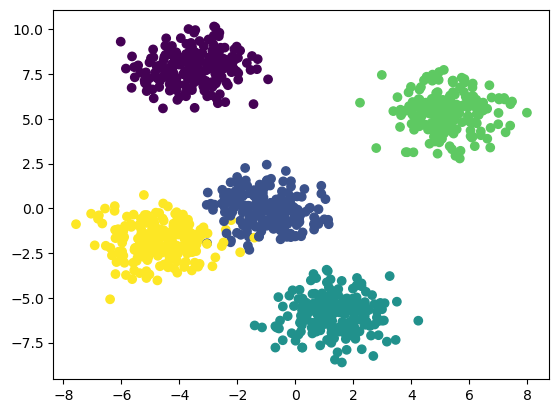

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

x, y = make_blobs(n_features=10,
                  n_samples=1000,
                  centers=5,
                  random_state=2023,
                  cluster_std=1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

### 1-3-2.데이터셋 표준화
모든 특성의 중요도를 동일하게 취급하기 위해 PCA 적용 전 표준화를 한다.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
std_data = scaler.transform(x)

print(std_data)

[[-0.79141896  1.76983511  1.46682749 ...  1.07991121 -0.80638096
   0.52742436]
 [ 1.75750095  0.80707124  0.62654627 ... -0.73482237  1.19944465
  -0.42450133]
 [ 1.72743987  0.93942918  0.47636397 ... -1.05622478  1.75210627
  -0.28948165]
 ...
 [ 1.55024702  0.98625261  1.25524733 ... -1.06322177  1.15014308
  -0.14786107]
 [-0.44940381  1.4715687   1.29300603 ...  1.33471578 -0.12156463
   0.53662496]
 [-0.82590311  1.12926591  0.6609848  ...  1.40949478 -0.28979904
   0.5205843 ]]


### 1-3-3.주성분 분석
from sklearn.decomposition import PCA 로 주성분분석 수행  
--> explained variance 값이 높은 순서대로 주성분들이 정렬됨  

In [10]:
import pandas as pd 
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # 주성분 10개 추출하기
reduced_data = pca.fit_transform(std_data)

# 데이터 확인
pca_df = pd.DataFrame(reduced_data)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.265105,-2.142595,-1.372683,-1.336993,0.604562,0.502660,-0.294409,-0.259680,-0.184177,-0.142393
1,3.635360,0.921397,-0.615796,-0.260101,-0.064974,0.184101,0.182571,0.268328,-0.171795,-0.245056
2,3.979711,0.894910,-0.450038,-0.371728,-0.439569,-0.162472,0.139321,-0.017344,-0.012514,-0.014387
3,-1.912027,2.739865,1.344975,-0.801262,-0.410567,0.470906,-0.290118,-0.006009,-0.407474,-0.026780
4,-1.233912,0.814316,-1.072045,1.349422,-0.215280,-0.211068,0.161938,-0.167767,-0.060685,0.079358


In [11]:
# explained variance 확인하기
print('분산 : ', pca.explained_variance_)

# explained variance의 비율 확인하기
print('비율 : ', pca.explained_variance_ratio_)

분산 :  [4.50457636 3.014561   1.25609058 0.88807367 0.13235749 0.06794951
 0.05642676 0.03460958 0.03187157 0.02349348]
비율 :  [0.45000718 0.30115464 0.12548345 0.08871856 0.01322251 0.00678816
 0.00563703 0.0034575  0.00318397 0.002347  ]


### 1-3-4.고윳값, 기여율, 누적 기여율 계산
- 고윳값 : explained variance
- 기여율 : explained variance ratio
- 누적 기여율 : cumulative explained variances  
기여율 = 특정 주성분의 분산에 대한 비율 = (특정 주성분 분산) / (모든 주성분 분산의 합)  


In [12]:
import numpy as np

index = np.array([f'pca{n+1}' for n in range(reduced_data.shape[1])])
result = pd.DataFrame({'고윳값' : pca.explained_variance_,
                       '기여율' : pca.explained_variance_ratio_},
                       index=index)
result['누적 기여율'] = result['기여율'].cumsum()

# 확인
display(result)

,고윳값,기여율,누적 기여율
pca1,4.504576,0.450007,0.450007
pca2,3.014561,0.301155,0.751162
pca3,1.256091,0.125483,0.876645
pca4,0.888074,0.088719,0.965364
pca5,0.132357,0.013223,0.978586
pca6,0.067950,0.006788,0.985375
pca7,0.056427,0.005637,0.991012
pca8,0.034610,0.003457,0.994469
pca9,0.031872,0.003184,0.997653
pca10,0.023493,0.002347,1.000000


#### 해석
- 고윳값이 0.7이상(또는 1)인 주성분을 기준으로 하여 누적기여율이 0.8~0.9이상일 때 주성분의 개수를 설정할 수 있다.
- 결과를 보면 pca1,2,3,4의 고윳값이 0.7이상/ 누적기여율이 96.5%이므로 
- 차원 축소를 위한 가장 적절한 주성분 개수는 4개로 판단할 수 있다.
  
- 하지만 시각화를 위해서는 일반적으로 2,3차원으로 축소하므로 다시 PCA를 실행하자

In [13]:
# pca = PCA(n_components=4) # 개수로 지정하기
pca = PCA(n_components=0.9) # 지정한 비율에 도달할 때까지 주성분 탐색

X_reduced = pca.fit_transform(std_data)
print(pca.explained_variance_ratio_)

[0.45000718 0.30115464 0.12548345 0.08871856]


In [14]:
pca = PCA(n_components=3) # 주성분 10개 추출하기
X_reduced = pca.fit_transform(std_data)

# 데이터 확인
pca_df = pd.DataFrame(X_reduced)
pca_df.head()

import numpy as np

index = np.array([f'pca{n+1}' for n in range(X_reduced.shape[1])])
result = pd.DataFrame({'고윳값' : pca.explained_variance_,
                       '기여율' : pca.explained_variance_ratio_},
                       index=index)
result['누적 기여율'] = result['기여율'].cumsum()

# 확인
display(result)

,고윳값,기여율,누적 기여율
pca1,4.504576,0.450007,0.450007
pca2,3.014561,0.301155,0.751162
pca3,1.256091,0.125483,0.876645


In [15]:
X_reduced

array([[-1.26510501, -2.14259474, -1.3726832 ],
       [ 3.63535984,  0.9213969 , -0.61579632],
       [ 3.97971068,  0.89490995, -0.45003759],
       ...,
       [ 3.91528905,  0.62377441, -0.56567984],
       [-1.17652577, -2.13380465, -1.30586516],
       [-1.59479032, -2.02478528, -0.84672208]])

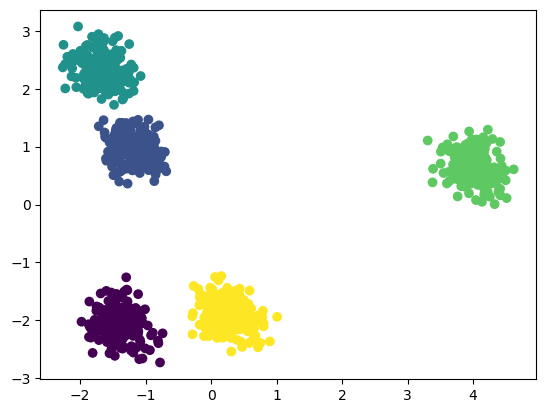

In [16]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.show()

# 1-4. t-SNE(t분산 확률적 이웃 임베딩, t-Distributed stochastic Neighbor Embedding)
높은 차원의 복집한 데이터를 2, 3차원으로 축소하는 방법  
  
- PCA와 차이점은?  
  PCA는 선형 변환으로 차원을 축소하고 t-SNE는 비선형적인 방법으로 축소한다.  

비선령적으로 차원을 축소 --> 표현력이 증가한다. 
  
t-SNE는 차원축소 시 비슷한 데이터들로 정리된 상태이므로 데이터 구조를 이해하는데 도움이 된다.  
고차원 공간에서 데이터의 유사성과 그에 해당하는 저차원 공간에서 데이터들의 유사성을 계한한다.  

# 1-5. t-SNE 실습하기

### 1-5-1. 데이터 생성

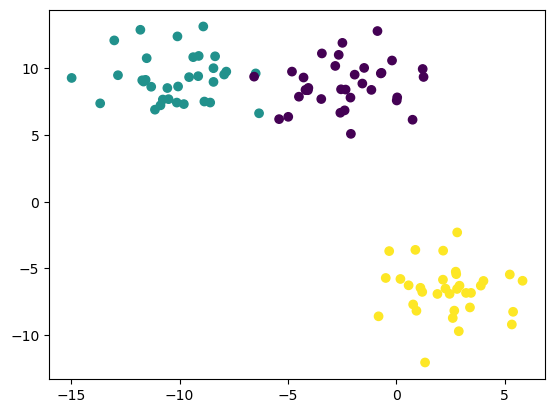

In [17]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

x, y = make_blobs(n_features=10, # 10차원의 데이터
                  n_samples=100,
                  centers=3, # 클러스터 개수 3개
                  random_state=42,
                  cluster_std=2)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

### 1-5-2. 2차원 t-SNE 시각화
TSNE(n_components=차원의 개수)

In [18]:
from sklearn.manifold import TSNE

# 2차원 t-SNE 임베딩하기
tsne_np = TSNE(n_components=2, random_state=1).fit_transform(x)

# DF로 변환
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])
tsne_df.head()

,component 0,component 1
0,17.098864,1.206077
1,17.382450,0.397006
2,17.327002,0.194470
3,-5.793094,-5.384990
4,-7.423450,5.462745


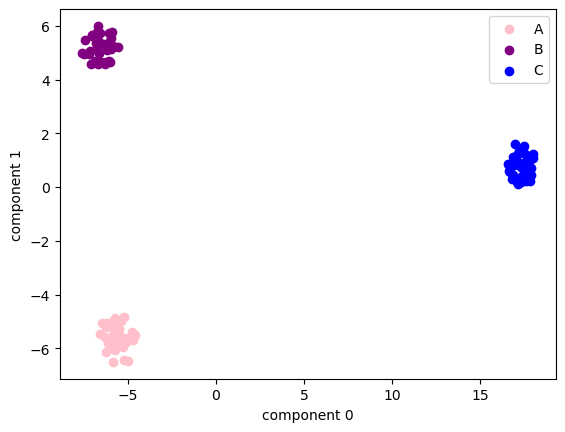

In [19]:
# 클래스만 분리
tsne_df['target'] = y

# 클래스별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'],
            color = 'pink',
            label = 'A')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'],
            color = 'purple',
            label = 'B')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'],
            color = 'blue',
            label = 'C')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

### 1-5-3. 3차원 t-sne 시각화
TSNE(n_components=차원의 개수)

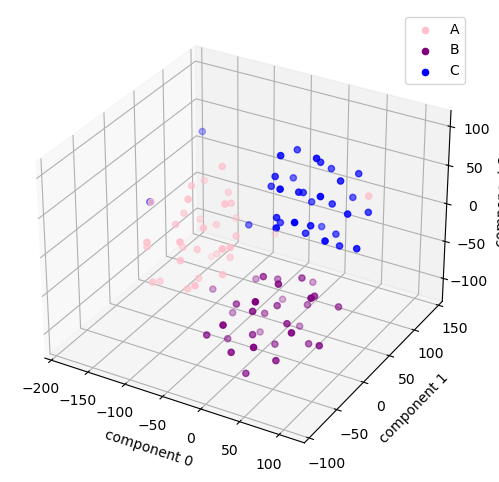

In [20]:
# 3차원 t-SNE 임베딩하기
tsne_np = TSNE(n_components=3, random_state=15).fit_transform(x)

# DF로 변환
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1', 'component 2'])

# 클래스만 분리
tsne_df['target'] = y

# 클래스별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# 시각화
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

# 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'],
            color = 'pink',
            label = 'A')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'],
            color = 'purple',
            label = 'B')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'],
            color = 'blue',
            label = 'C')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

# 2.군집화

# 2-1. K-평균 군집화(K-Means Clustering)
k개의 군집을 나누기 위해 각 군집의 중심과 데이터 간의 평균 거리를 활용한다.  
군집 내 거리 계산의 기준이 될 점을 K개로 설정하고, 해당 점에서 다른 데이터간의 거리를 계산한다.  
최종 군집의 기준점은 보통 클러스터 중신에 위피하기 때문에 Centroid라고 부른다.  
데이터 간 거리가 가까운 데이터를 비슷한 특징을 가진 데이터로 간주하여 기준점과 다른 데이터 간의 거리가 최소화되는 점을 찾아나가면서 군집화 한다.  

## 2-1-1. 알고리즘 이해하기

#### 1)군집의 수 K를 선택

#### 2)임의로 K개의 기준점 선택
Centroid 역할을 한다

#### 3)K개의 군집을 만든다
각 데이터 포인트에서 K개의 중심까지 거리를 측정하여 가장 가까운 군집에 포인트를 할당한다.  

#### 4)각 군집의 새 중심을 계산한다
(x', y') = ((x₁ + x₂ + x₃ + ...)/n, (y₁ + y₂ + y₃ + ...)/n)

#### 5)각 군집의 품질 평가를 실시한다
WCSS = ∑(∑distance(d,c)²)

#### 6)2~3번을 반복한다

# 2-2. K-Means 실습

- KMeans 하이퍼파라미터
    - n_clusters : 클러스트의 개수(기준점 개수)
    - max_iter : 단일 실행에 대한 K-평균 군집화 알고리즘의 최대 반복 횟수
- 군집화 후 객체 속성
    - labels : 군집 번호
    - cluster_centers : 군집별 기준점의 좌표

In [21]:
from sklearn.cluster import KMeans
import numpy as np

In [22]:
# 데이터 생성
X = np.array([[1,2], [1,4], [1,0], [10,2], [10,4], [10,0]])

# K-평균 군집화 알고리즘 모델 생성
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# 결과 확인
print(kmeans.labels_)
print(kmeans.predict([[0,0], [12,3]]))
print(kmeans.cluster_centers_)

c:\Users\Eunjeong\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Eunjeong\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


# 2-3.DBSCAN(Density Based Spatial Clustering of Application with Noise)
노이즈가 있는 애플리케이션의 밀도 기반 공간 군집화  
데이터가 밀집한 정도를 기반으로 군집화하는 알고리즘  
어떤 점을 기준으로 반경 ε내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식, 점이 몰려있어서 밀도가 높은 부분을 클러스터링 하는 방식이다.  
K-means와 같이 군집의 수를 정하지 않아도 되며, 군집의 밀도에 따라 서로 연결하기 때문에 기하학적인 모양을 갖는 군집도 잘 찾을 수 있다.  
노이즈 포인트를 통해 이상치 검출이 가능하다

#### 알고리즘 원리
- 데이터 p가 존재할 때, ε 최소 거리를 기준으로 ε 반경 내에 몇 개의 데이터가 위치하는지 센다.   
  이때 ε 반경 내에 위치한 데이터가 min_points의 개수를 넘는 경우 p의 이웃이 되고 같은 군집으로 분류된다.  
- 핵심 데이터(Core Point)는 군집 내의 밀집된 지역에 있는 것으로, 해당 점을 기준으로 ε 반경내에 MinPts개 이상의 데이터가 있는 경우 핵심 데이터가 된다.   
  핵심 데이터의 ε 반경 내의 데이터는 모두 동일한 클러스터에 속한다.  
- 경계 데이터는 군집 내에 속하지만 해당 점을 기준으로 ε 반경 내에 MinPts개 미만의 데이터가 있는 것이다.  
- 핵심 데이터 또는 경계 데이터도 아닌 데이터는 노이즈(Noise Point)로 판단한다.  

# 2-3.DBSCAN 실습

- sklearn, dbscan 하이퍼파라미터
    - eps : 이웃을 정의하기 위한 거리(epsilon)
    - min_samples : 군집 정의하기 위한 eps 반경 내 최소 데이터 수
- 반환 객체의 속성
    - labels : 군집 번호(노이즈의 경우 -1)
    - core_sample_indices : 핵심 데이터의 익덱스

#### 1)데이터 생성

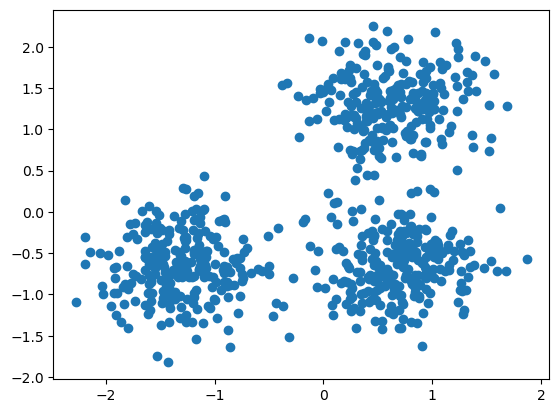

In [29]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# 실습용 데이터 생성
centers = [[1, 1], [-1, -1], [1, -1]] #합성 클러스터 3개 생성
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

# 데이터 표준화
X = StandardScaler().fit_transform(X)

# 데이터 시각화
# import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### 2)DBSCAN으로 군집화하기
- 객체의 labels 속성을 사용하여 각 데이터의 군집 레이블을 확일하 수 있다.
- 노이즈 데이터의 레이블은 -1로 지정된다

In [27]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

# DBSCAN 모델 정의 및 학습
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Noisy samples를 제외한 클러스터 개수 확인
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Noisy samples 개수 확인
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


- 클러스터링 알고리즘은 기본적으로 비지도학습 방법으로 데이터의 레이블을 알 수 없다. 그러나 make_blobs 함수를 통해 데이터 생성 시 합성 클러스터의 레이블을 알 수 있다.
- 이 레이블 데이터를 군집화의 품질을 정량화하는 평가지표로 사용할 수 있다.
- 실제 레이블을 알 수 없는 경우 모델 결과 자체를 사용해야만 평가를 수행할 수 있다.
- 이 경우 실루엣 계수(Sihouettet Coefficient)가 유용하다.

In [30]:
print(f"Homogeneity(동질성): {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness(완전성): {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index(조정된 랜드 지수): {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information(조정된 상호정보량):"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient(실루엣 계수): {metrics.silhouette_score(X, labels):.3f}")

Homogeneity(동질성): 0.953
Completeness(완전성): 0.883
V-measure: 0.917
Adjusted Rand Index(조정된 랜드 지수): 0.952
Adjusted Mutual Information(조정된 상호정보량): 0.916
Silhouette Coefficient(실루엣 계수): 0.626


#### 3)시각화
- core point / board point : 각각 큰 점, 작은 점으로 시각화되며, 할당된 클러스터에 따라 색상으로 구분된다.
- noise point 태그가 지정된 샘플은 검은색으로 표시됨

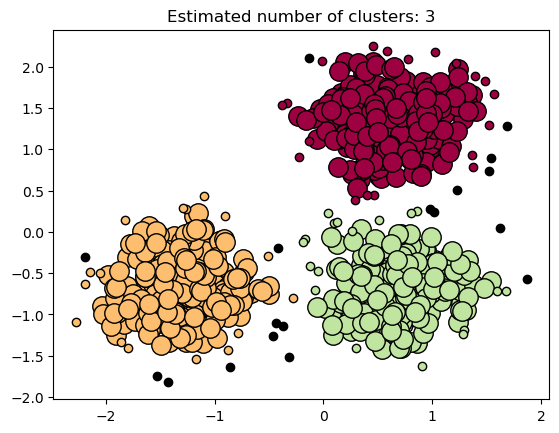

In [31]:
# 레이블 유일값 설정
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# 클러스터 색상 구분
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

#시각화
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 레이블이 -1로 지정된 Noise Point 검은 색으로 지정
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()
